# K Means Clustering  and K Mode CLustering - Clustering on mixed datatypes

Useful resource :

https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086


## K means clustering

K-means clustering is an unsupervised machine learning algorithm used to cluster data points based on their similarity. It works by grouping data points into clusters based on their Euclidean distance from a randomly chosen centroid point. The algorithm iteratively updates the centroids of the clusters until the clusters are stable, meaning that the data points within the cluster do not move appreciably from one iteration to the next. K-means clustering is one of the most popular clustering algorithms and is used in a wide variety of applications such as customer segmentation, market segmentation, anomaly detection, and image segmentation.

K means clustering is more suited to continueous data , however it can still funciton with some categrocial data. 

#### Simple K means clustering

This is a short implimentation of what we saw in the workshop

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
data['target'] = load_iris()['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Quicky explore the continuous data

Below we have a look at the distribution of our data faceted by iris type . We then have a look at the pair plot of the data

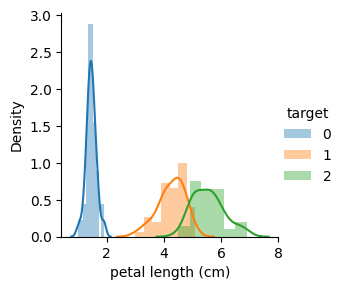

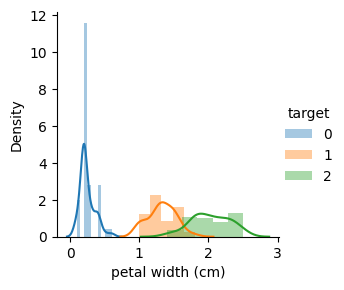

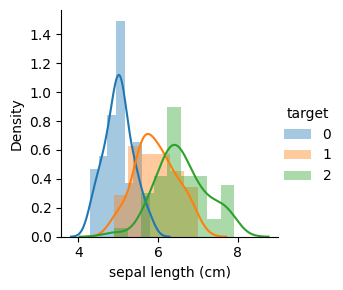

In [25]:
sns.FacetGrid(data,hue="target",size=3).map(sns.distplot,"petal length (cm)").add_legend()
plt.show()
sns.FacetGrid(data,hue="target",size=3).map(sns.distplot,"petal width (cm)").add_legend()
plt.show()
sns.FacetGrid(data,hue="target",size=3).map(sns.distplot,"sepal length (cm)").add_legend()
plt.show()

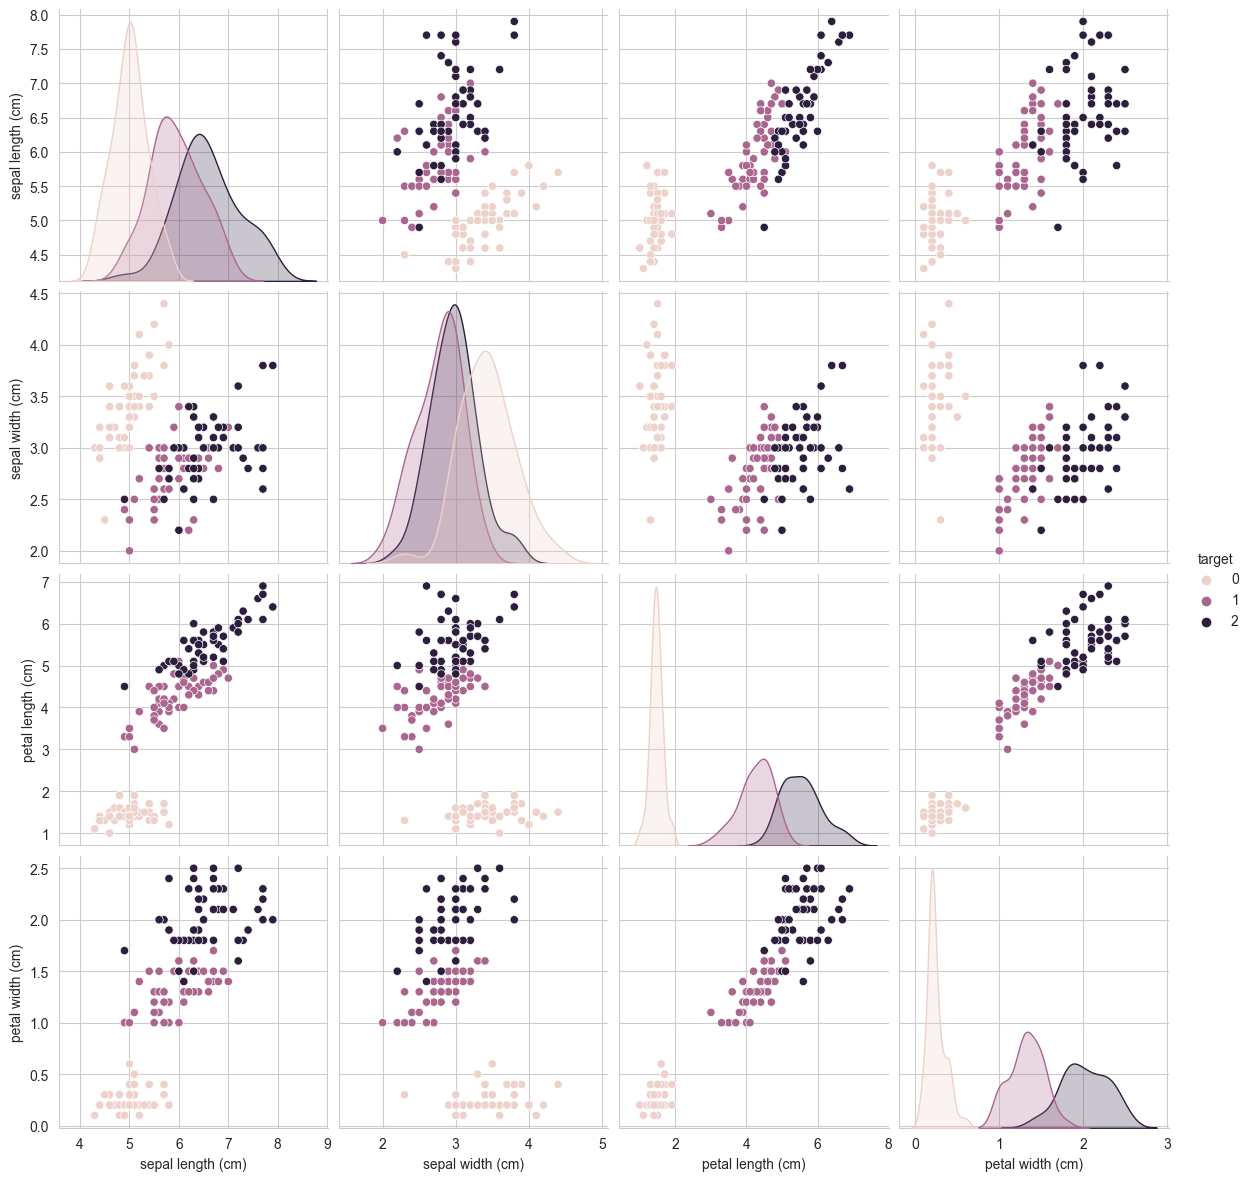

In [28]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="target",size=3);
plt.show()

Lets now run an elbow plot to explore cluster number

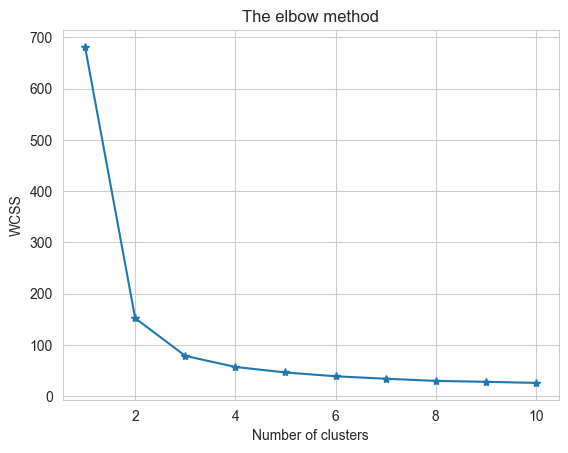

In [33]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data.iloc[:, 0:-1])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, len(wcss) +1), wcss, '-*')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
data['y_kmeans'] = kmeans.fit_predict(data.iloc[:, 0:-1])

Insert a column to show our cluster number

In [37]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,y_kmeans
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In this specific example we know the class the iris belonged too. It can be therefore interesting to see if the unsperivsed clustering matched the true result. Below we do this first graphically and then I calulcate an effective accuracy on the points that the cluster identified in a group and the actual ground truth. Note when you do clustering the cluster number has no meanigful label apart from a tag. Therefore once the clusters have been created we may want to re map the cluster name so that it matches with the naming convention in the ground truth data.

Note this is actually how semi-supervised learning can work. Where you do not have labelled data you can cluster it, investigate the properties of your cluster and then if the clustering is good / you investigate if it has grouped the data well you can then label all the points in that cluster as a class and retrain the data using a supervised approach. 

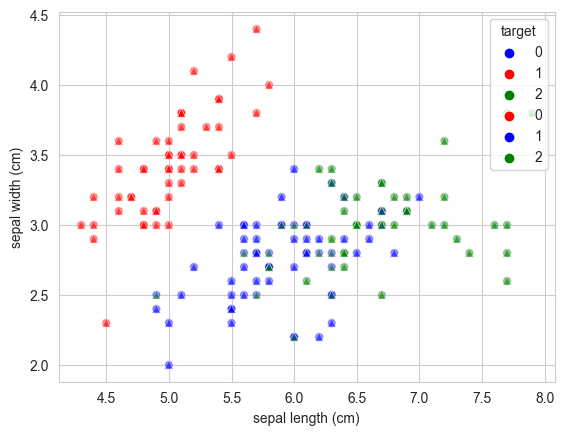

In [71]:

sns.scatterplot(data = data, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'y_kmeans', alpha = 0.5, palette = {0: 'blue', 1: 'red', 2: 'green'})
sns.scatterplot(data = data, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'target', alpha = 0.5, palette = {1: 'blue', 0: 'red', 2: 'green'}, marker = '^')
# sns.scatterplot
plt.show()
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

In cases where we have data with targets we can compare how the clustering did compared to the ground truth target. 

In the plot above we look at how the algorithm clustered the data in comparision to the true label . Triangles represent the ground truth label

In [84]:
data['adjusted_k_means'] = np.where(data.y_kmeans == 1, 0, 1)
data['adjusted_k_means'] = np.where(data.y_kmeans == 0, 1, 0)
data['adjusted_k_means'][data.y_kmeans == 2] = 2
print(' Percentage of clustering points that matched with target = :' ,100 * (data.target == data.adjusted_k_means).sum() / len(data))

 Percentage of clustering points that matched with target = : 89.33333333333333


## K modes clustering 

K modes clustering is a clustering technique used for categorical variables. It is an extension of the popular k-means clustering algorithm which is used for numerical variables. Unlike k-means clustering, k modes clustering uses a different distance measure, the Hamming distance, to calculate the distance between two clusters. This makes it better suited for clustering categorical variables.
K modes clustering is used when the dataset contains categorical variables. It is used to group similar objects together based on the categorical variables they possess.

The Hamming distance is a measure of the number of substitutions required to turn one string of characters into another. It is commonly used in data mining and information theory to calculate the distance between two strings of equal length. The distance is calculated by counting the number of positions at which the two strings differ. For example, the Hamming distance between "cat" and "cot" is 1, since they differ only at the second position.

The mode of a data set is the most commonly occurring value. In k modes clustering, the mode of each cluster is used to measure the distance between two clusters. This is done by calculating the number of positions at which the modes of the two clusters differ. The greater the number of positions at which the modes differ, the greater the distance between the two clusters.

## K modes example

In [91]:
df = pd.read_csv('https://github.com/DrPBaksh/workshop-data/blob/main/10000%20Sales%20Records.csv?raw=true')

In [92]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [93]:
df.select_dtypes('object').nunique()

Region               7
Country            185
Item Type           12
Sales Channel        2
Order Priority       4
Order Date        2691
Ship Date         2719
dtype: int64

In [156]:
# !pip install kmodes #  install this if not already on the kernel 


In [95]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 7]


Lets cluster using categorical column however not the date columns

In [110]:
from kmodes.kmodes import KModes

data = df.iloc[:, [0, 1, 2, 3, 4]]
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1563, cost: 30388.0
Run 1, iteration: 2/100, moves: 19, cost: 30388.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1248, cost: 30443.0
Run 2, iteration: 2/100, moves: 46, cost: 30443.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3969, cost: 29591.0
Run 3, iteration: 2/100, moves: 32, cost: 29591.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 30838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1012, cost: 31526.0
Run 5, iteration: 2/100, moves: 48, cost: 31526.0
Best run was number 3
[['Europe' 'United Kingdom' 'Cereal' 'Online' 'L']
 ['Middle East and North Africa' 'Morocco' 'Clothes' 'Offline' 'H']
 [

Note the output at the bottom gives the most frequent values for each column. We may wish to look into the distributions of each class before naming it though. See below

In [111]:
cost = []
for k in range(1, 10):
    print('running cluster ... ', k)
    km = KModes(n_clusters=k ,init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(data)
    cost.append(km.cost_)
    

running cluster ...  1
running cluster ...  2
running cluster ...  3
running cluster ...  4
running cluster ...  5
running cluster ...  6
running cluster ...  7
running cluster ...  8
running cluster ...  9


Text(0, 0.5, 'cost')

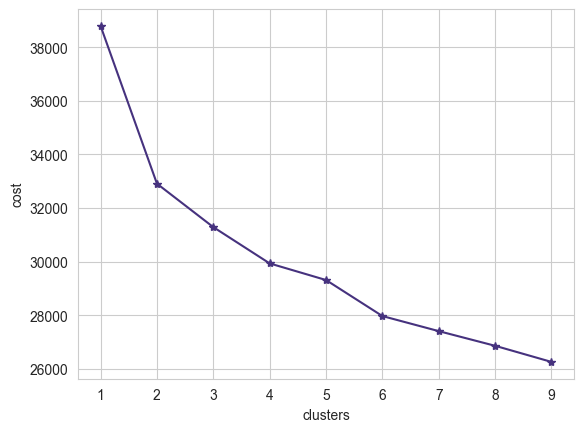

In [112]:
plt.plot(range(1, 10),  cost, '*-')
plt.xlabel('clusters')
plt.ylabel('cost')

From the K modes clustering we have identified 3 clusters (approximately) so we then train the model on the 3 cluster problem. 

In [129]:
data = df.iloc[:, [0, 1, 2, 3, 4]]
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3445, cost: 31298.0
Run 1, iteration: 2/100, moves: 66, cost: 31298.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 31407.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1124, cost: 32213.0
Run 3, iteration: 2/100, moves: 14, cost: 32213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 31752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1115, cost: 31724.0
Run 5, iteration: 2/100, moves: 12, cost: 31724.0
Best run was number 1
[['Europe' 'United Kingdom' 'Cereal' 'Online' 'H']
 ['Sub-Saharan Africa' 'Swaziland' 'Vegetables' 'Offline' 'C']
 ['Middle East and North Africa' 'Morocco' 'Snacks' 'Offlin

In [159]:
df['cluster_id'] = km.labels_ 
data['cluster_id'] = km.labels_ 

The output shows the most frequent occurance for each column in each cluster. This may help in descibin gthe cluster however the graphs below may also be of use

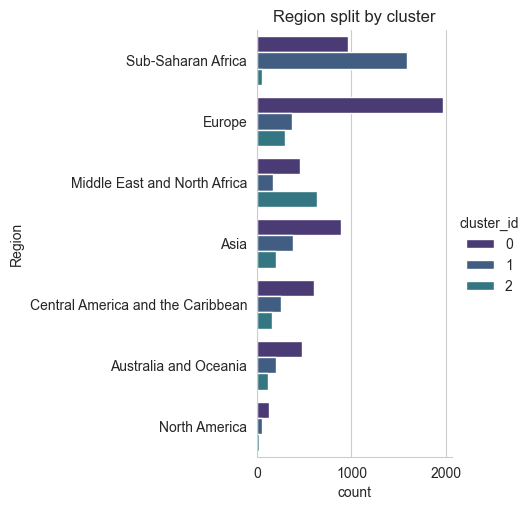

<Figure size 640x480 with 0 Axes>

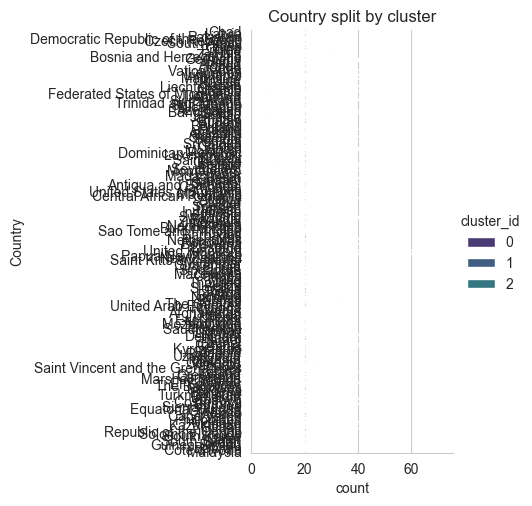

<Figure size 640x480 with 0 Axes>

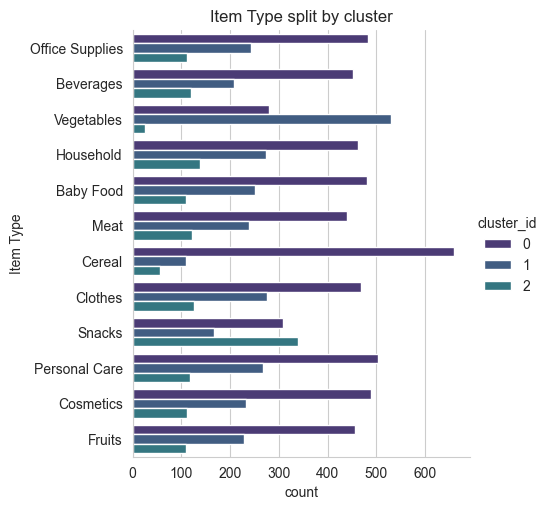

<Figure size 640x480 with 0 Axes>

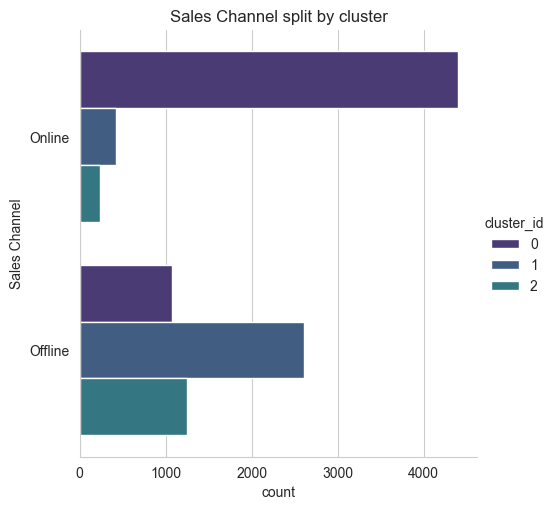

<Figure size 640x480 with 0 Axes>

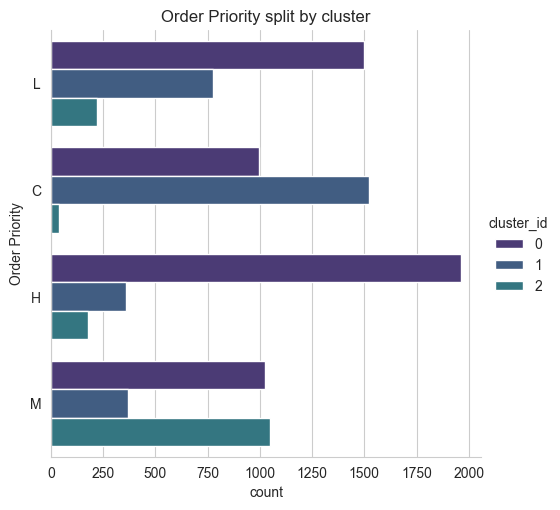

<Figure size 640x480 with 0 Axes>

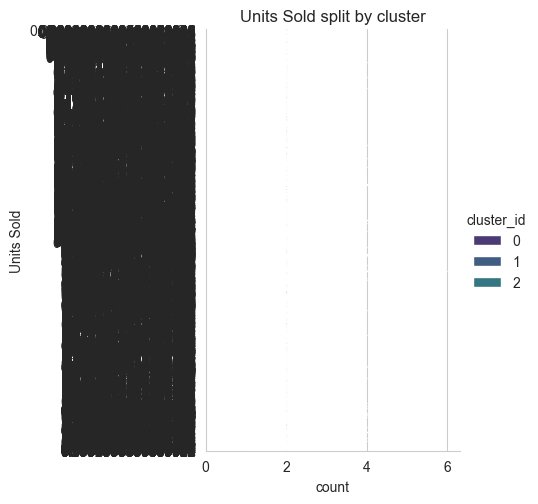

<Figure size 640x480 with 0 Axes>

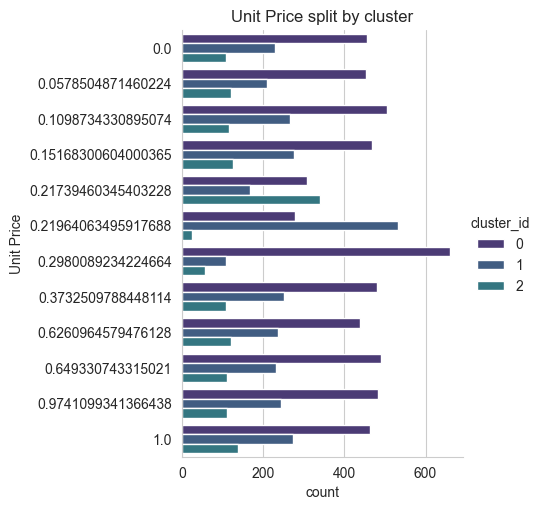

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

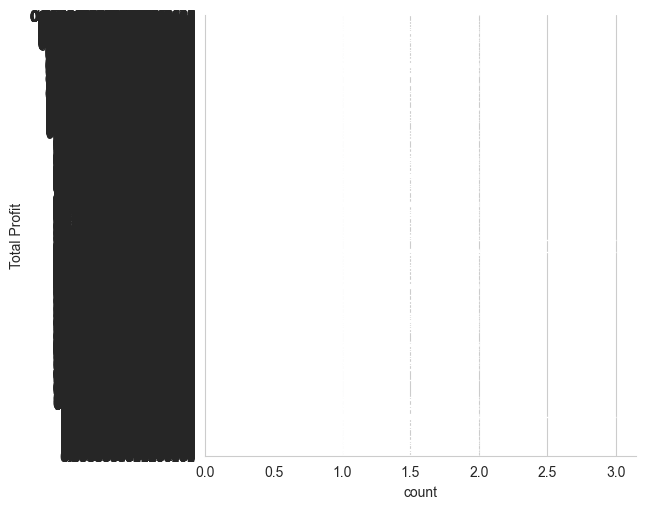

In [161]:
for var in data.columns:
    sns.catplot(data=data,y=var,hue='cluster_id',kind='count');
    plt.title(str(var)+' split by cluster')
    plt.figure();
    
    plt.show()

## K-prototype Algorithm 

 K-means clusters data using euclidean distance. Meanwhile, K-modes clusters categorical data based off the number of matching categories between data points. A mixture of both of these: the K-prototype algorithm, is just what we need to cluster our fake customers!

First, lets normalize the continuous features in our data to ensure that one feature is not interpreted as being more important than the other.

In [130]:
from sklearn import preprocessing
numeric_columns = ['Units Sold' , 'Unit Price', 'Total Profit']

scaler = preprocessing.MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [132]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,0.448290,0.974110,0.325672
1,Europe,Latvia,Beverages,Online,C,0.107321,0.057850,0.009660
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,0.651430,0.219641,0.236603
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,0.768254,1.000000,0.732544
4,Europe,Czech Republic,Beverages,Online,C,0.348970,0.057850,0.031428


Below we impliment the analysis with the K prototype algorithm. We have implimented it for 3 clusters however as with k means and k mode we could have performed an elbow analysis

In [137]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=3)
clusters = kproto.fit_predict(data, categorical=[0, 1, 2, 3, 4])



#join data with labels 
labels = pd.DataFrame(clusters)
labeleddata = pd.concat((data,labels),axis=1)
labeleddata = labeleddata.rename({0:'labels'},axis=1)

In [138]:
labeleddata = labeleddata.rename({0:'labels'},axis=1)
labeleddata.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Units Sold        float64
Unit Price        float64
Total Profit      float64
labels             uint16
dtype: object

Below we can explore The attributes of our cluster

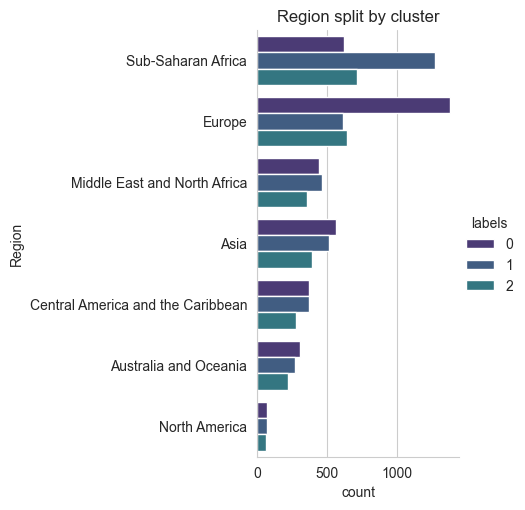

<Figure size 640x480 with 0 Axes>

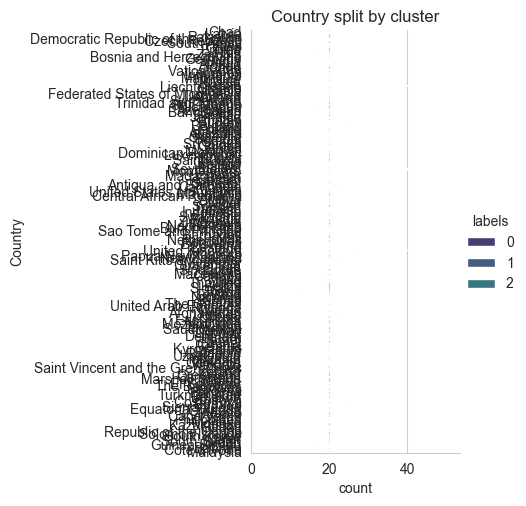

<Figure size 640x480 with 0 Axes>

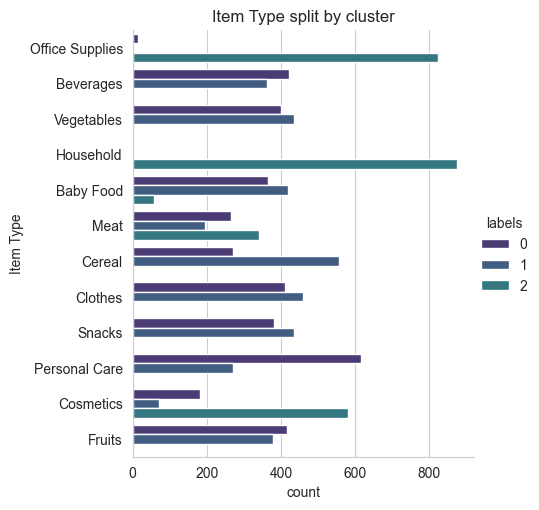

<Figure size 640x480 with 0 Axes>

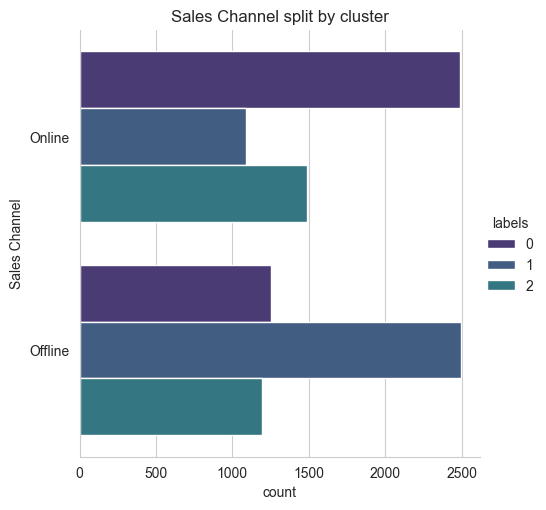

<Figure size 640x480 with 0 Axes>

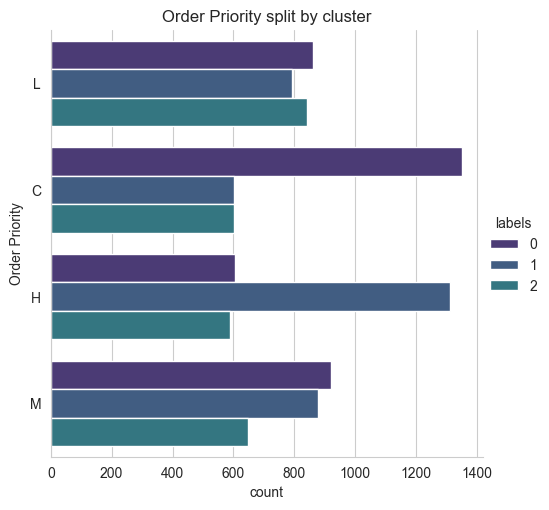

<Figure size 640x480 with 0 Axes>

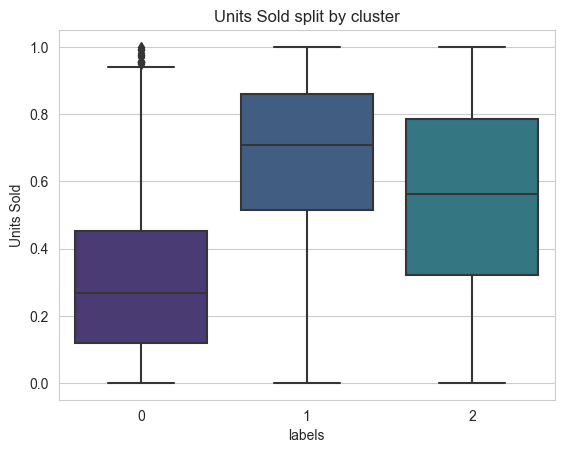

<Figure size 640x480 with 0 Axes>

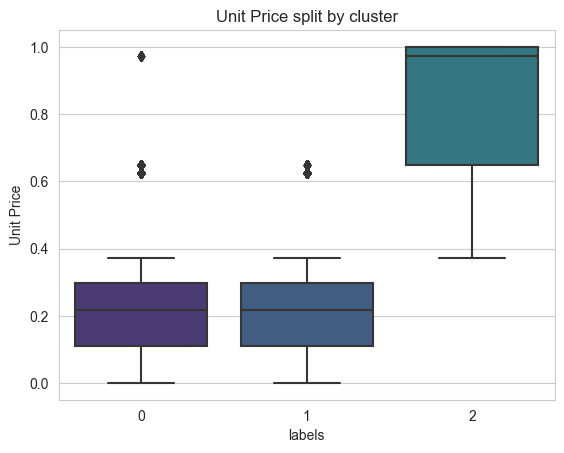

<Figure size 640x480 with 0 Axes>

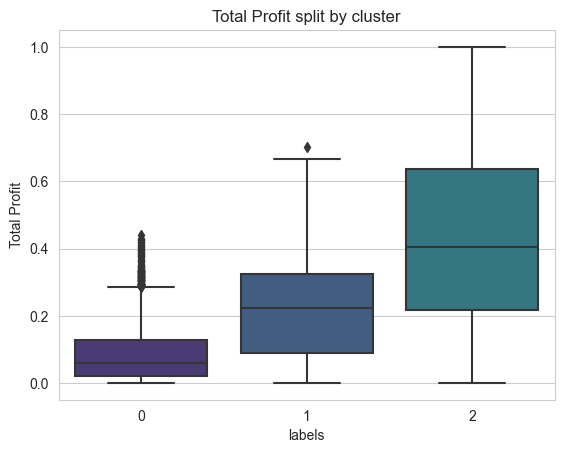

<Figure size 640x480 with 0 Axes>

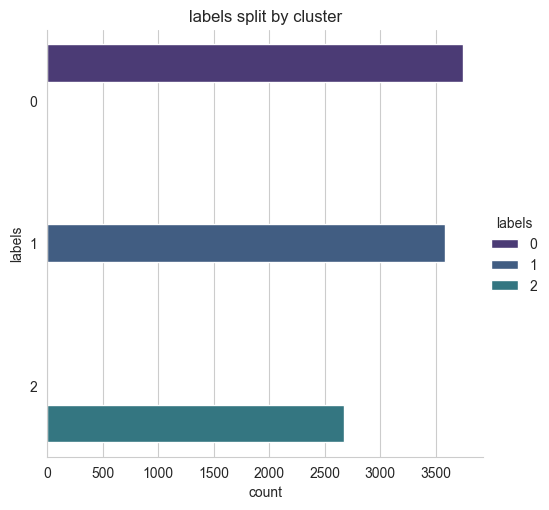

<Figure size 640x480 with 0 Axes>

In [154]:
for var in labeleddata.columns:
    if labeleddata[var].dtype=='float64':
        # sns.stripplot(data=labeleddata,y='labels',x=var,alpha=0.2);
        sns.boxplot(data=labeleddata,x='labels',y=var);
    else:
        sns.catplot(data=labeleddata,y=var,hue='labels',kind='count');
    plt.title(str(var)+' split by cluster')
    plt.figure();
    
    plt.show()

In [151]:
labeleddata.sample(23)


,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Total Profit,labels
4186,Middle East and North Africa,Pakistan,Household,Offline,M,0.161532,1.000000,0.154155,2
3774,Sub-Saharan Africa,Rwanda,Clothes,Offline,L,0.330066,0.151683,0.139492,1
4334,Europe,San Marino,Office Supplies,Online,H,0.807161,0.974110,0.586287,2
4603,Australia and Oceania,Kiribati,Personal Care,Online,L,0.529506,0.109873,0.076331,0
9617,Middle East and North Africa,United Arab Emirates,Household,Online,L,0.218744,1.000000,0.208695,2
515,Central America and the Caribbean,Honduras,Cosmetics,Offline,M,0.965793,0.649331,0.966089,2
4510,Central America and the Caribbean,Jamaica,Meat,Offline,M,0.552010,0.626096,0.181665,1
3453,Europe,Serbia,Baby Food,Offline,M,0.698140,0.373251,0.385040,1
4002,Sub-Saharan Africa,Cote d'Ivoire,Snacks,Online,L,0.436187,0.217395,0.138385,0
6810,Europe,Luxembourg,Vegetables,Online,C,0.825265,0.219641,0.299728,0


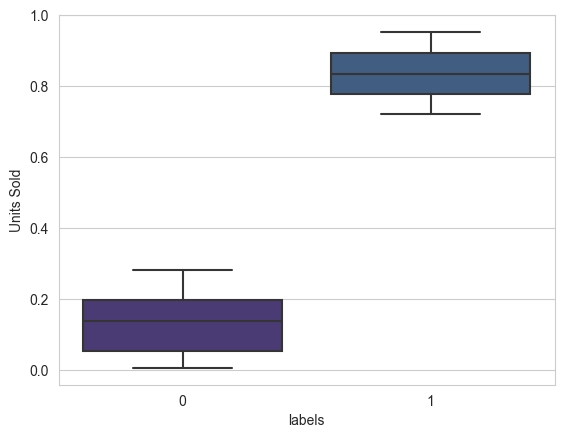

In [153]:
 sns.boxplot(data=labeleddata.sample(10),x='labels',y='Units Sold');

### Why not one hot encode you categorical variables?

The simple answer is you can and it will work. However where you have a mixture of data types one hot encoding of your categorical data is likely to put far more of the decission weight to the categorical columns. If you are 5 unique values in a categrocial column then after one hot encoding you will now have 5 columns each with equal weight. This is now giving far more weight to this intial feature than any numerical feature and hence it is very likely your clustering algorithm will be weighted heavily to the 